# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.svm import SVC
seed = 42

# Lectura

In [3]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Support Vector Machines

Separamos en distintas optimizaciones por recursos computacionales

### Kernel Linear

In [4]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm = GridSearchCV(SVC(random_state = seed
                                  , kernel='linear'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='roc_auc')

In [5]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.1, kernel='linear', random_state=42)
El AUC es de: 0.851


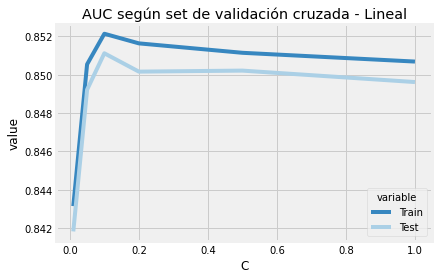

In [6]:
C_list = [i for i in grid_search_svm.cv_results_['param_C'].data]


mean_test_score_list = list(grid_search_svm.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(C_list,mean_train_score_list, mean_test_score_list)),
                                columns=['C','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['C'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='C', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada - Lineal')

plt.show()

### Kernel Poly

In [7]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_poly = GridSearchCV(SVC(random_state = seed
                                  , kernel='poly'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_poly.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='roc_auc')

In [8]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm_poly.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm_poly.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.1, kernel='poly', random_state=42)
El AUC es de: 0.825


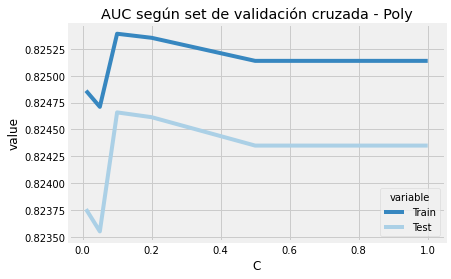

In [9]:
C_list = [i for i in grid_search_svm_poly.cv_results_['param_C'].data]


mean_test_score_list = list(grid_search_svm_poly.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm_poly.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(C_list,mean_train_score_list, mean_test_score_list)),
                                columns=['C','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['C'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='C', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada - Poly')

plt.show()

### Kernel radial

In [10]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_rbf = GridSearchCV(SVC(random_state = seed
                                  , kernel='rbf'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_rbf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='roc_auc')

In [11]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm_rbf.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm_rbf.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.2, random_state=42)
El AUC es de: 0.822


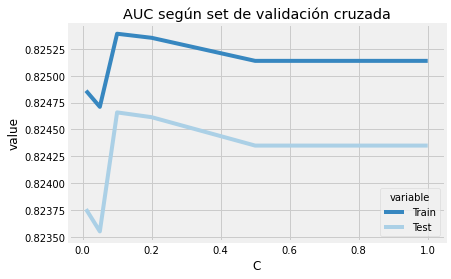

In [12]:
C_list = [i for i in grid_search_svm_poly.cv_results_['param_C'].data]


mean_test_score_list = list(grid_search_svm_poly.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm_poly.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(C_list,mean_train_score_list, mean_test_score_list)),
                                columns=['C','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['C'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='C', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada')

plt.show()

Radial - gamma

In [15]:
param_grid = {
    'gamma': [0.1, 0.3 ,0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_rbf_g = GridSearchCV(SVC(random_state = seed
                                  , kernel='rbf'
                                  , C = 0.2
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_rbf_g.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(C=0.2, random_state=42), n_jobs=-1,
             param_grid={'gamma': [0.1, 0.3, 0.5, 1]}, return_train_score=True,
             scoring='roc_auc')

In [16]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm_rbf_g.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm_rbf_g.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.2, gamma=0.1, random_state=42)
El AUC es de: 0.852


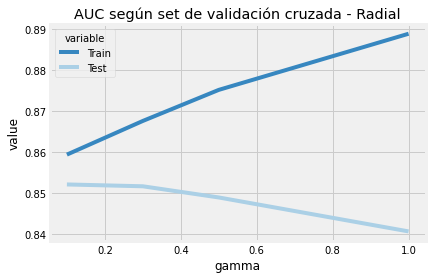

In [17]:
gamma_list = [i for i in grid_search_svm_rbf_g.cv_results_['param_gamma'].data]


mean_test_score_list = list(grid_search_svm_rbf_g.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm_rbf_g.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(gamma_list,mean_train_score_list, mean_test_score_list)),
                                columns=['gamma','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['gamma'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='gamma', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada - Radial')

plt.show()

## SVM final - Radial, c=0.2, gamma = 0.1

# Resultados CV test

In [34]:
results = cross_validate(
    grid_search_svm_rbf_g.best_estimator_,
    X_train,
    y_train,
    cv=kfold,
    scoring=['accuracy', 'precision', 'recall', "f1", "roc_auc"],
    return_train_score=False,
    n_jobs=-1
)

results_svm = pd.DataFrame(results)

In [35]:
mean_results = pd.DataFrame(results_svm.mean(axis=0), columns=['test_cv'])
mean_results

,test_cv
fit_time,0.13
score_time,0.18
test_accuracy,0.79
test_precision,0.74
test_recall,0.57
test_f1,0.64
test_roc_auc,0.85


In [36]:
mean_results.to_csv('../data/cv_results/svm.csv', index=False)

# Resultados test

In [37]:
preds = grid_search_svm_rbf_g.predict(X_test)
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       603
           1       0.74      0.49      0.59       297

    accuracy                           0.78       900
   macro avg       0.77      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900

0.7043318759736671


# Guardamos modelo y resultados

In [38]:
resultados_dict = {
    'AUC': roc_auc_score(y_test,preds),
    'Accuracy': accuracy_score(y_test,preds),
    'Recall': recall_score(y_test,preds),
    'Precision': precision_score(y_test,preds),
    'F1_score': f1_score(y_test,preds)
}

In [39]:
resultados = pd.DataFrame(resultados_dict,index=['Resultados en test']).T

In [40]:
resultados

,Resultados en test
AUC,0.70
Accuracy,0.78
Recall,0.49
Precision,0.74
F1_score,0.59


In [41]:
resultados.to_csv('../data/resultados/svm.csv',index=False)

In [42]:
import pickle
pickle.dump(grid_search_svm_rbf_g, open('../data/modelos/svm.pkl', 'wb'))